In [1]:
#importo librerie
import numpy as np
import pandas as pd
import yfinance as yf
from scipy import stats
from scipy.stats import norm

In [2]:
def call_BS(S0, K, T, r, sigma):
    d1 = (np.log(S0/K) + (r + sigma**2 /2)*T)/ (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    return S0 * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

In [3]:
S0 = 100
K = 101
T = 1
r = 0.05
C0 = 8

In [4]:
#definiamo implide volatility
def iv_call_BS(S0, K, T, r, C0):
    high = 20
    low = 0
    while high - low > 0.00001: 
        if call_BS(S0, K, T, r, (high + low) / 2) > C0:
            high = (high + low) / 2
        else:
            low = (high + low) / 2

    return (high + low) / 2


In [5]:
#compute implide volatility
implide_volatility = iv_call_BS(S0, K, T, r, C0)
implide_volatility

0.1491689682006836

In [6]:
sigma = implide_volatility

In [7]:
C0_BS = call_BS(S0, K, T, r, sigma)
C0_BS

8.000084283976442

In [8]:
#ESERCIZIO 2
calls = pd.read_csv('AMZNCalls.csv')

In [9]:
calls

,K,C0
0,145.0,40.25
1,150.0,34.70
2,155.0,30.65
3,160.0,26.49
4,165.0,21.22
5,170.0,17.55
6,175.0,14.50
7,180.0,11.41
8,185.0,8.90
9,190.0,6.94


In [10]:
S0 = 180.75
r = 0.054
T = 0.23

In [11]:
calls['iv_BS'] = calls.apply(lambda row:
                             iv_call_BS(S0, row['K'], T, r, row['C0']),  axis = 1)
calls

,K,C0,iv_BS
0,145.0,40.25,0.463510
1,150.0,34.70,0.381322
2,155.0,30.65,0.380635
3,160.0,26.49,0.365396
4,165.0,21.22,0.301118
5,170.0,17.55,0.294719
6,175.0,14.50,0.297523
7,180.0,11.41,0.287509
8,185.0,8.90,0.283570
9,190.0,6.94,0.284457


In [12]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'AMZN volatility smile')

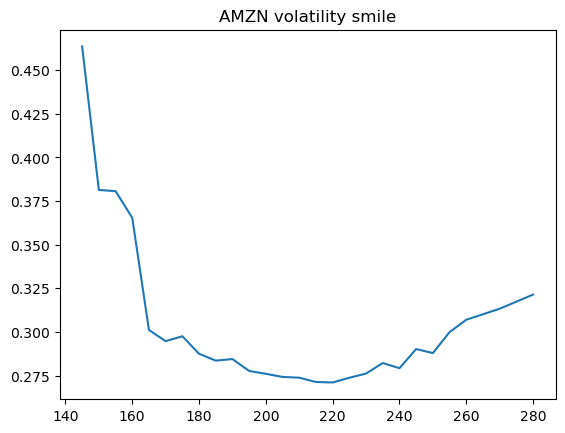

In [13]:
x = calls['K']
y = calls['iv_BS']
plt.plot(x,y)
plt.title('AMZN volatility smile')
